In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
df = pd.read_csv('D:\excelR\Random_Forest\Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA


In [3]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
cols = ['ShelveLoc', 'Urban', 'US']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df2 = df
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


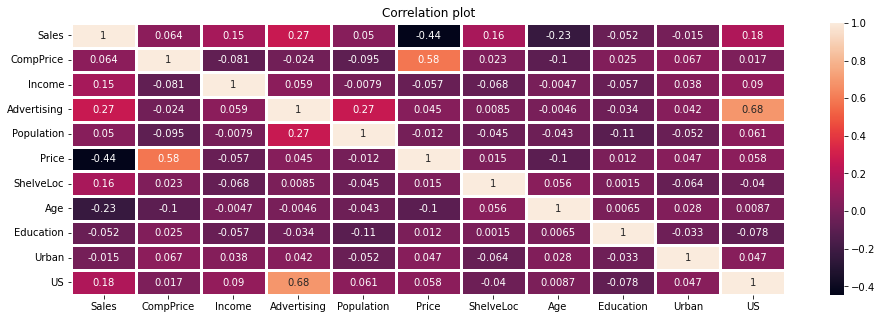

In [6]:
import seaborn as sns 
plt.figure(figsize = (16,5))
corr_plot = sns.heatmap(df2.corr(),annot = True,linewidths=3)
plt.title("Correlation plot")
plt.show()

In [7]:
df2['Saleslabels'] = pd.cut(x=df2['Sales'], bins=[0,5,10, 20], labels=['Low', 'Average','High'], right=False)
df3=df2
df3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Saleslabels
0,9.50,138,73,11,276,120,0,42,17,1,1,Average
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Average
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Average
397,7.41,162,26,12,368,159,2,40,18,1,1,Average
398,5.94,100,79,7,284,95,0,50,12,1,1,Average


# Model Validation

# Train-Test-Split

In [8]:
from sklearn.model_selection import train_test_split
y = df3.pop("Saleslabels")
X = df3.iloc[:,1:12]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (320, 10)
train size y :  (320,)
test size X :  (80, 10)
test size y :  (80,)


# Bagging
# Bagging Classifier

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[196   0   0]
 [  0  61   0]
 [  0   0  63]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Average  High   Low  accuracy  macro avg  weighted avg
precision      1.0   1.0   1.0       1.0        1.0           1.0
recall         1.0   1.0   1.0       1.0        1.0           1.0
f1-score       1.0   1.0   1.0       1.0        1.0           1.0
support      196.0  61.0  63.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[43  3  2]
 [ 7 11  0]
 [ 6  0  8]]
ACCURACY SCORE:
0.7750
CLASSIFICATION REPORT:
             Average       High        Low  accuracy  macro avg  weighted avg
precision   0.767857   0.785714   0.800000     0.775   0.784524      0.777500
recall      0.895833   0.611111   0.571429     0.775   0.692791      0.775000
f1-score    0.826923   0.687500   0.666667     0.775   0.727030      0.767508
support    48.000000  18.000000  14.000000     0.775  80.000000     80.000000


In [11]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.775}}

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[196   0   0]
 [  0  61   0]
 [  0   0  63]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Average  High   Low  accuracy  macro avg  weighted avg
precision      1.0   1.0   1.0       1.0        1.0           1.0
recall         1.0   1.0   1.0       1.0        1.0           1.0
f1-score       1.0   1.0   1.0       1.0        1.0           1.0
support      196.0  61.0  63.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[45  1  2]
 [ 8 10  0]
 [ 9  0  5]]
ACCURACY SCORE:
0.7500
CLASSIFICATION REPORT:
             Average       High        Low  accuracy  macro avg  weighted avg
precision   0.725806   0.909091   0.714286      0.75   0.783061      0.765029
recall      0.937500   0.555556   0.357143      0.75   0.616733      0.750000
f1-score    0.818182   0.689655   0.476190      0.75   0.661342      0.729415
support    48.000000  18.000000  14.000000      0.75  80.000000     80.000000


In [13]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.775},
 'Random Forest': {'Train': 1.0, 'Test': 0.75}}

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=100, max_features=5, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[196   0   0]
 [  0  61   0]
 [  0   0  63]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Average  High   Low  accuracy  macro avg  weighted avg
precision      1.0   1.0   1.0       1.0        1.0           1.0
recall         1.0   1.0   1.0       1.0        1.0           1.0
f1-score       1.0   1.0   1.0       1.0        1.0           1.0
support      196.0  61.0  63.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[43  2  3]
 [ 5 13  0]
 [ 7  0  7]]
ACCURACY SCORE:
0.7875
CLASSIFICATION REPORT:
             Average       High        Low  accuracy  macro avg  weighted avg
precision   0.781818   0.866667   0.700000    0.7875   0.782828      0.786591
recall      0.895833   0.722222   0.500000    0.7875   0.706019      0.787500
f1-score    0.834951   0.787879   0.583333    0.7875   0.735388      0.780327
support    48.000000  18.000000  14.000000    0.7875  80.000000     80.000000


In [15]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.775},
 'Random Forest': {'Train': 1.0, 'Test': 0.75},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7875}}

# Boosting 
# Adaboost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[178   4  14]
 [ 26  35   0]
 [ 37   0  26]]
ACCURACY SCORE:
0.7469
CLASSIFICATION REPORT:
              Average       High        Low  accuracy   macro avg  \
precision    0.738589   0.897436   0.650000  0.746875    0.762008   
recall       0.908163   0.573770   0.412698  0.746875    0.631544   
f1-score     0.814645   0.700000   0.504854  0.746875    0.673167   
support    196.000000  61.000000  63.000000  0.746875  320.000000   

           weighted avg  
precision      0.751428  
recall         0.746875  
f1-score       0.731801  
support      320.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[47  1  0]
 [ 7 11  0]
 [11  0  3]]
ACCURACY SCORE:
0.7625
CLASSIFICATION REPORT:
             Average       High        Low  accuracy  macro avg  weighted avg
precision   0.723077   0.916667   1.000000    0.7625   0.879915      0.815096
recall      0.979167   0.611111   0.214286    0.7625   0.601521      0.762500
f1-score    0.831858   0.733333   0.352941 

In [17]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.775},
 'Random Forest': {'Train': 1.0, 'Test': 0.75},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7875},
 'AdaBoost': {'Train': 0.746875, 'Test': 0.7625}}

# Stochastic Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[196   0   0]
 [  0  61   0]
 [  1   0  62]]
ACCURACY SCORE:
0.9969
CLASSIFICATION REPORT:
              Average  High        Low  accuracy   macro avg  weighted avg
precision    0.994924   1.0   1.000000  0.996875    0.998308      0.996891
recall       1.000000   1.0   0.984127  0.996875    0.994709      0.996875
f1-score     0.997455   1.0   0.992000  0.996875    0.996485      0.996866
support    196.000000  61.0  63.000000  0.996875  320.000000    320.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[40  6  2]
 [ 5 12  1]
 [ 8  0  6]]
ACCURACY SCORE:
0.7250
CLASSIFICATION REPORT:
             Average       High        Low  accuracy  macro avg  weighted avg
precision   0.754717   0.666667   0.666667     0.725   0.696017      0.719497
recall      0.833333   0.666667   0.428571     0.725   0.642857      0.725000
f1-score    0.792079   0.666667   0.521739     0.725   0.660162      0.716552
support    48.000000  18.000000  14.000000     0.725  80.000000   

In [19]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.775},
 'Random Forest': {'Train': 1.0, 'Test': 0.75},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7875},
 'AdaBoost': {'Train': 0.746875, 'Test': 0.7625},
 'Gradient Boosting': {'Train': 0.996875, 'Test': 0.725}}

# Stacking 
# Voting Ensemble

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[196   0   0]
 [ 38  23   0]
 [ 31   0  32]]
ACCURACY SCORE:
0.7844
CLASSIFICATION REPORT:
              Average       High        Low  accuracy   macro avg  \
precision    0.739623   1.000000   1.000000  0.784375    0.913208   
recall       1.000000   0.377049   0.507937  0.784375    0.628329   
f1-score     0.850325   0.547619   0.673684  0.784375    0.690543   
support    196.000000  61.000000  63.000000  0.784375  320.000000   

           weighted avg  
precision      0.840519  
recall         0.784375  
f1-score       0.757846  
support      320.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[47  0  1]
 [13  5  0]
 [11  0  3]]
ACCURACY SCORE:
0.6875
CLASSIFICATION REPORT:
             Average       High        Low  accuracy  macro avg  weighted avg
precision   0.661972   1.000000   0.750000    0.6875   0.803991      0.753433
recall      0.979167   0.277778   0.214286    0.6875   0.490410      0.687500
f1-score    0.789916   0.434783   0.333333 

In [21]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.775},
 'Random Forest': {'Train': 1.0, 'Test': 0.75},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7875},
 'AdaBoost': {'Train': 0.746875, 'Test': 0.7625},
 'Gradient Boosting': {'Train': 0.996875, 'Test': 0.725},
 'Voting': {'Train': 0.784375, 'Test': 0.6875}}

# Comparing Models

<AxesSubplot:>

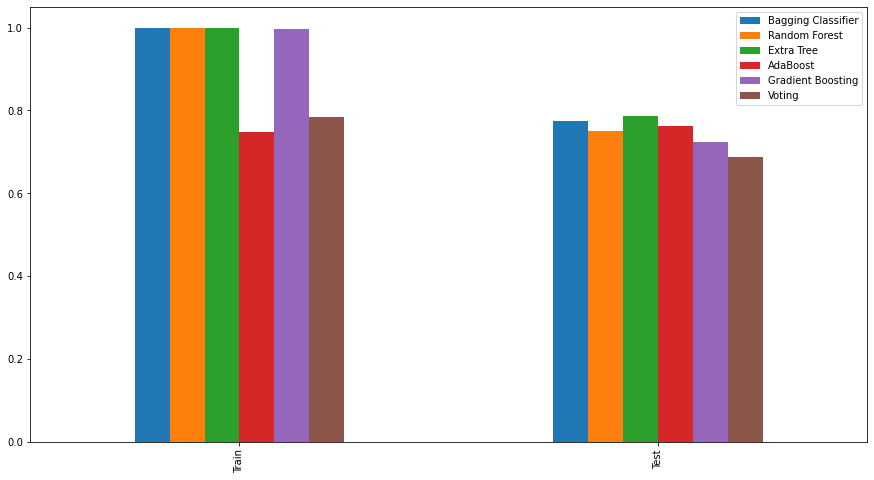

In [22]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='bar', figsize=(15, 8))

# Regression 

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [40]:
from sklearn.model_selection import KFold
array = df2.values
X2 = array[:,1:12]
y2 = array[:,0]

kfold = KFold(n_splits=10, random_state=7,shuffle=True)


In [25]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(X2, y2)
    y2_pred = model.predict(X2)
    
    return mean_squared_error(y2, y2_pred, squared= False) # squared= False > returns Root Mean Square Error   

In [26]:
linear_regression = make_pipeline(LinearRegression())
score = rmse(linear_regression)
models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 1.8418599620617053


In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= 42))
score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 1.8418623171880355


In [28]:
kernel_ridge= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse(kernel_ridge)
models_scores.append(['KernelRidge', score])
print(f'KernelRidge Score= {score}')

KernelRidge Score= 1.211959715838577


In [29]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
score =rmse(decision_tree)
models_scores.append(['DecisionTreeRegressor', score])
print(f'DecisionTreeRegressor Score= {score}')

DecisionTreeRegressor Score= 0.0


In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
SVR = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
score = rmse(SVR)
models_scores.append(['SVR', score])
print(f'SVR Score= {score}')

SVR Score= 1.5736770811662364


In [31]:
# Ranking the scores of each model
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
3,DecisionTreeRegressor,0.000000
2,KernelRidge,1.211960
4,SVR,1.573677
0,LinearRegression,1.841860
1,Lasso,1.841862


# Bagging 
# Bagging Regressor

In [32]:

def bagging_predictions(estimator):
    
    regr = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            n_jobs= -1,
                            random_state=42).fit(X2, y2)

    br_y_pred = regr.predict(X2)

    rmse_val = mean_squared_error(y2, br_y_pred, squared= False) # squared= False > returns Root Mean Square Error   

    print(f'RMSE for Bagging Regressor as base estimator {regr.base_estimator_} = {rmse_val}\n')
    return br_y_pred
    
predictions = np.column_stack((bagging_predictions(linear_regression),
                              bagging_predictions(lasso),
                              bagging_predictions(SVR),
                              bagging_predictions(decision_tree),
                              bagging_predictions(kernel_ridge)))                        


RMSE for Bagging Regressor as base estimator Pipeline(steps=[('linearregression', LinearRegression())]) = 1.8443821225082058

RMSE for Bagging Regressor as base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=42))]) = 1.844362062573138

RMSE for Bagging Regressor as base estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) = 1.5855012137492732

RMSE for Bagging Regressor as base estimator DecisionTreeRegressor() = 0.6719951004285671

RMSE for Bagging Regressor as base estimator KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial') = 1.2669674318246733



# Boosting 

In [33]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   random_state = 42)

score = rmse(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 0.7501521708803838


In [34]:
xgb_regressor= xgb.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, random_state = 42)
score = rmse(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 0.9498022430039007


In [35]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=100,
                              random_state = 42)
score = rmse(lgbm_regressor)
models_scores.append(['LGBMRegressor', score])
print(f'LGBMRegressor Score= {score}')

LGBMRegressor Score= 1.1472759797356749


In [36]:
# Ranking the scores of each model
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
3,DecisionTreeRegressor,0.000000
5,GradientBoostingRegressor,0.750152
6,XGBRegressor,0.949802
7,LGBMRegressor,1.147276
2,KernelRidge,1.211960
4,SVR,1.573677
0,LinearRegression,1.841860
1,Lasso,1.841862


# Stacking

In [37]:
estimators = [ ('decision_tree', decision_tree), ('SVR', SVR)]

stack = StackingRegressor(estimators=estimators, cv= kfold, n_jobs= -1, passthrough = True)

stack.fit(X2, y2)

pred = stack.predict(X2)

rmse_val = mean_squared_error(y2, pred, squared= False) # squared= False > returns Root Mean Square Error    
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}')                      

rmse= 1.059504336814091


# Comparing Models

In [38]:
models_df = pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)
models_df.columns = ['Models', 'Rmse_vales']
models_df

,Models,Rmse_vales
3,DecisionTreeRegressor,0.000000
5,GradientBoostingRegressor,0.750152
6,XGBRegressor,0.949802
8,Stacking,1.059504
7,LGBMRegressor,1.147276
2,KernelRidge,1.211960
4,SVR,1.573677
0,LinearRegression,1.841860
1,Lasso,1.841862


<AxesSubplot:xlabel='Models'>

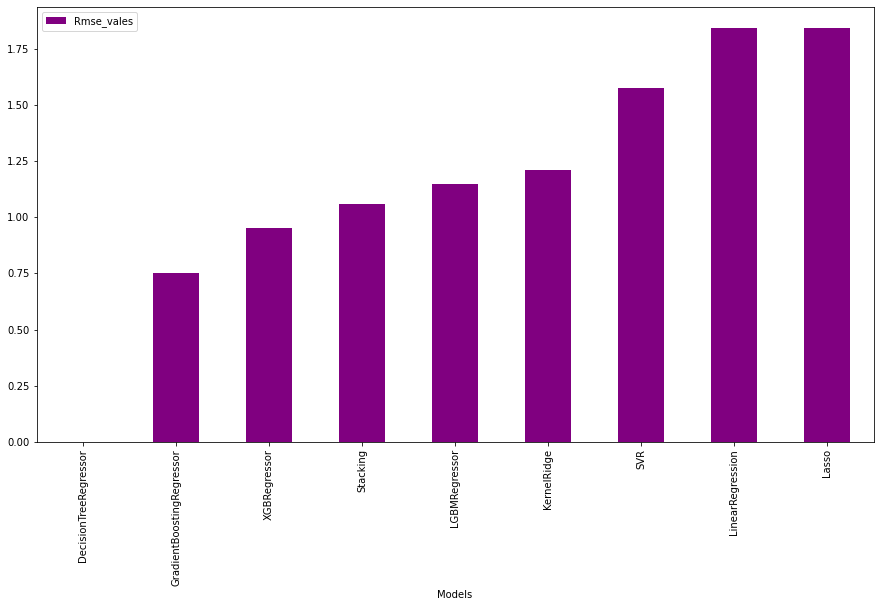

In [41]:
models_df.plot(x='Models', y='Rmse_vales', kind='bar', figsize=(15, 8),color='purple')